# Ονοματεπώνυμο: Τσιβούλα Σοφία
## Α.Μ Π2018130

Το παρακάτω αρχείο ipynb περιέχει την αναφορά εργαστηρίων για το μάθημα "ΠΡΟΣΟΜΟΙΩΣΗ ΚΑΙ ΜΟΝΤΕΛΟΠΟΙΗΣΗ" του Ζ'εξαμήνου. 

Ο κώδικας για την αναφορά έχει γραφεί σε γλώσσα προγραμματισμού Python (https://www.python.org/). Ο κώδικας γράφηκε και υλοποιήθηκε στην πλατφόρμα Google Collab (https://colab.research.google.com/) 

Αρχικά γίνονται import οι κατάλληλες βιβλιοθήκες για την δημιουργία διαγραμμάτων και για την υλοποίση κώδικα

In [1]:
# η numpy χρησιμοποιείται για την καλύτερη δημιουργία και απεικόνιση πινάκων
import numpy as np

# η matplotlib είναι βιβλιοθήκη που βοηθά στην δημιουργία διαγραμμάτων
from matplotlib import pyplot as plt

# η random είναι μια βιβλιοθήκη που βοηθά στην παραγωγή ψευδοτυχαίων ακεραίων αριθμών
import random

# Εργαστήριο 1 (18.10.2021)

## Περίπτωση 1:

Οι Η/Υ του δικτύου δεν διαθέτουν εγκατεστημένο λογισμικό προστασίας (antivirus)
και σε κάθε χρονική στιγμή ο κάθε μολυσμένος Η/Υ επιλέγει με τυχαίο τρόπο να
μολύνει άλλον ένα ακόμα Η/Υ.
1. Να γράψετε κατάλληλο κώδικα σε γλώσσα προγραμματισμού της επιλογής
σας (C, Java, Python κλπ κλπ) που να προσομοιώνει το παραπάνω πρόβλημα.

2. Να παραστήσετε γραφικά τον αριθμό μολυσμένων Η/Υ σε συνάρτηση με το
χρόνο.


In [2]:
# variables

# το πλήθος των υπολογιστών
N = 1000

# πίνακας 2D για την δημιουργία του simulation
system = np.zeros(N)

# υγιείς κόμβοι (όσοι δεν έχουν μολυνθεί ακόμα).
healthyNodes = 0 

# το πλήθος των μολυσμένων υπολογιστών
infectedNodes = 0

# το πλήθος των μολυσμένων υπολογιστών στο συγκεκριμένο timestep
currentInfected = 0 

# πίνακας για αποθήκευση των μολυσμένων κόμβων
infectedArray = []

In [3]:
# παράγεται ένας τυχαίος ακέραιος για να μολυνθεί 
x = random.randint(0, N-1)

system[x] = 1

# αυξάνεται ο αριθμός των μιλυσμένων και προστέθεται στο infectedArray
currentInfected = currentInfected + 1
infectedNodes = infectedNodes + 1
infectedArray.append(currentInfected)

# υλοποιείται η διαδικασία της μόλυνσης μέχρι να μολυνθούν όλοι οι υπολογιστές
while infectedNodes < N:
  infect = random.randint(0, N-1)

  # αν ο υπολογιστής δεν είναι μολυσμένος (έχει δηλαδή την τιμή 0)
  if system[infect] == 0:
    # μόλυνέ τον αλλάζοντας την τιμή του σε 1
    system[infect] = 1
    currentInfected += 1
    infectedNodes += 1 
  # προσθήκη του μολυσμένου υπολογιστή στον πίνακα
  infectedArray.append(currentInfected)


 Βήματα:  6425


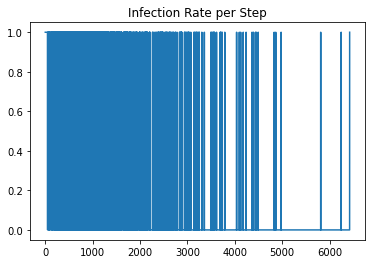

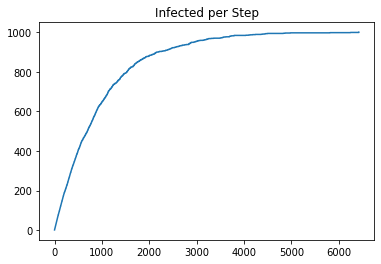

In [4]:
# δημιουργία κατάλληλων γραφήμάτων
rateGrouth= []

# υπολογισμός του αριθμού μολύνσεων σε κάθε βήμα
for i in range (len(infectedArray)-1):
  rate = infectedArray[i+1] - infectedArray[i]
  rateGrouth.append(rate)

# εμφάνηση του πίνακα με τα δεδομένα μολύνσεων σε κάθε βήμα
print("\n Βήματα: " , len(rateGrouth))
plt.plot(rateGrouth)
plt.title("Infection Rate per Step")
plt.show()

plt.plot(infectedArray)
plt.title("Infected per Step")
plt.show()


# Εργαστήριο 2 (25.10.2021)

# Περίπτωση 1

Μεταβάλλοντας το ρυθμό μετάδοσης β του κακόβουλου λογισμικού στη
μονάδα του χρόνου, να παραστήσετε γραφικά την εξέλιξη του πληθυσμού
των μολυσμένων Η/Υ σε συνάρτηση με το χρόνο. Τι παρατηρείτε; 



Η περίπτωση 1 αφορά ένα σύστημα Η/Υ όπου σε βάθος χόνου, ο κάθε ένας μολυσμένος Η/Υ μπορεί να μολύνει έναν υγιή. 

In [5]:
# variables

# το πλήθος των υπολογιστών
N = 1000
# πίνακας 2D για την δημιουργία του simulation
system = np.zeros(N)
# υγιείς κόμβοι (όσοι δεν έχουν μολυνθεί ακόμα).
healthyNodes = 0 
# το πλήθος των μολυσμένων υπολογιστών
infectedNodes = 0
# το πλήθος των μολυσμένων υπολογιστών στο συγκεκριμένο timestep
currentInfected = 0 
# πίνακας για αποθήκευση των μολυσμένων κόμβων
infectedArray_chain = []

In [6]:
# παράγεται ένας τυχαίος ακέραιος για να μολυνθεί 
x = random.randint(0, N-1)
system[x] = 1

# αυξάνεται ο αριθμός των μολυσμένων και προστέθεται στο infectedArray
currentInfected = currentInfected + 1
infectedNodes = infectedNodes + 1
infectedArray.append(currentInfected)

# υλοποιείται η διαδικασία της μόλυνσης μέχρι να μολυνθούν όλοι οι υπολογιστές
while infectedNodes < N:
  # για κάθε μολυσμένο υπολογιστή βρες έναν υπολογστή να μολύνεις
  for i in range (0,currentInfected):
    infect = random.randint(0, N-1)
    # αν ο Η/Υ είναι υγιής τότε γίνεται η μόλυνση
    if system[infect] == 0:
      system[infect] = 1
      currentInfected += 1
      infectedNodes += 1 
  infectedArray_chain.append(currentInfected)

[2, 4, 8, 16, 29, 56, 100, 158, 200, 184, 128, 65, 32, 9, 5, 2]


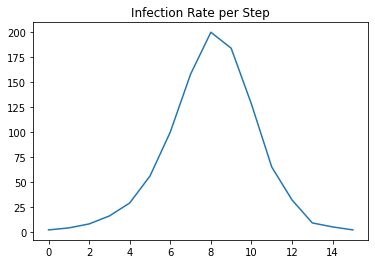

[2, 4, 8, 16, 32, 61, 117, 217, 375, 575, 759, 887, 952, 984, 993, 998, 1000]


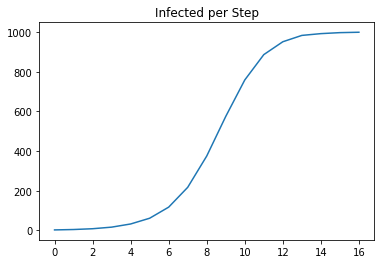

In [7]:
# δημιουργία κατάλληλων γραφήμάτων
rateGrouth_chain= []
for i in range (len(infectedArray_chain)-1):
  rate = infectedArray_chain[i+1] - infectedArray_chain[i]
  rateGrouth_chain.append(rate)

print(rateGrouth_chain)
plt.plot(rateGrouth_chain)
plt.title("Infection Rate per Step")
plt.show()

print(infectedArray_chain)
plt.plot(infectedArray_chain)
plt.title("Infected per Step")
plt.show()


# Εργαστήριο 3 (1.11.2021)
## Περίπτωση 2

Η πιθανότητα μόλυνσης από ένα μολύσμένο Η/Υ γίνεται με μια x τιμή πιθανότητας. 

Θα πραγματοποιηθούν 2 υλοποιήσεις για 2 διαφορετικές τιμές πιθανότητας
1. 10% πιθανότητα μόλυσης
2. 50% πιαθνότητα μόλυνσης

In [8]:
# Περίπτωση για μόλυνση με πιθανότητα 10%

# variables

# το πλήθος των υπολογιστών
N = 1000
# πίνακας 2D για την δημιουργία του simulation
system = np.zeros(N)
# υγιείς κόμβοι (όσοι δεν έχουν μολυνθεί ακόμα).
healthyNodes = 0 
# το πλήθος των μολυσμένων υπολογιστών
infectedNodes = 0
# το πλήθος των μολυσμένων υπολογιστών στο συγκεκριμένο timestep
currentInfected = 0 
# πίνακας για αποθήκευση των μολυσμένων κόμβων
infectedArray_10p = []

In [9]:
# παράγεται ένας τυχαίος ακέραιος για να μολυνθεί 
x = random.randint(0, N-1)
system[x] = 1

# αυξάνεται ο αριθμός των μολυσμένων και προστέθεται στο infectedArray
currentInfected = currentInfected + 1
infectedNodes = infectedNodes + 1
infectedArray.append(currentInfected)

# υλοποιείται η διαδικασία της μόλυνσης μέχρι να μολυνθούν όλοι οι υπολογιστές
while infectedNodes < N:
  # για κάθε μολυσμένο υπολογιστή βρες έναν υπολογστή να μολύνεις
  for i in range (0,currentInfected):
    infect = random.randint(0, N-1)

    # παραγωγή ενός τυχαίου αριθμού απο το 1 έως το 10
    possibility = random.randint(1,10)
    # αν ο αριθμός που επιλέχθηκε είναι το ένα, τότε γίνεται η μόλυνση, αλλιώς, δεν γίνεται
    if possibility == 1:
      # αν ο Η/Υ είναι υγιής τότε γίνεται η μόλυνση
      if system[infect] == 0:
        system[infect] = 1
        currentInfected += 1
        infectedNodes += 1 
  infectedArray_10p.append(currentInfected)

6428


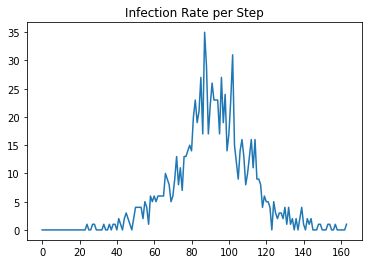

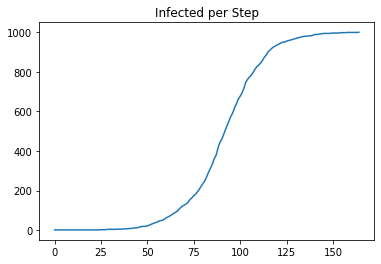

In [10]:
# δημιουργία κατάλληλων γραφήμάτων
rateGrouth_10p = []
for i in range (len(infectedArray_10p)-1):
  rate = infectedArray_10p[i+1] - infectedArray_10p[i]
  rateGrouth_10p.append(rate)

print(len(infectedArray))
plt.plot(rateGrouth_10p)
plt.title("Infection Rate per Step")
plt.show()

print("\n")
plt.plot(infectedArray_10p)
plt.title("Infected per Step")
plt.show()


Μόλυνση με πιθανότητα 50% σε κάθε timestep

In [11]:
# Περίπτωση για μόλυνση με πιθανότητα 50%

# variables

# το πλήθος των υπολογιστών
N = 1000
# πίνακας 2D για την δημιουργία του simulation
system = np.zeros(N)
# υγιείς κόμβοι (όσοι δεν έχουν μολυνθεί ακόμα).
healthyNodes = 0 
# το πλήθος των μολυσμένων υπολογιστών
infectedNodes = 0
# το πλήθος των μολυσμένων υπολογιστών στο συγκεκριμένο timestep
currentInfected = 0 
# πίνακας για αποθήκευση των μολυσμένων κόμβων
infectedArray_50p = []

In [12]:
# παράγεται ένας τυχαίος ακέραιος για να μολυνθεί 
x = random.randint(0, N-1)
system[x] = 1

# αυξάνεται ο αριθμός των μολυσμένων και προστέθεται στο infectedArray
currentInfected = currentInfected + 1
infectedNodes = infectedNodes + 1
infectedArray.append(currentInfected)

# υλοποιείται η διαδικασία της μόλυνσης μέχρι να μολυνθούν όλοι οι υπολογιστές
while infectedNodes < N:
  # για κάθε μολυσμένο υπολογιστή βρες έναν υπολογστή να μολύνεις
  for i in range (0,currentInfected):
    infect = random.randint(0, N-1)

    # παραγωγή ενός τυχαίου αριθμού απο το 1 έως το 10
    possibility = random.randint(1,10)
    # αν ο αριθμός που επιλέχθηκε είναι το ένα, τότε γίνεται η μόλυνση, αλλιώς, δεν γίνεται
    if possibility >=5 :
      # αν ο Η/Υ είναι υγιής τότε γίνεται η μόλυνση
      if system[infect] == 0:
        system[infect] = 1
        currentInfected += 1
        infectedNodes += 1 
  infectedArray_50p.append(currentInfected)

6429


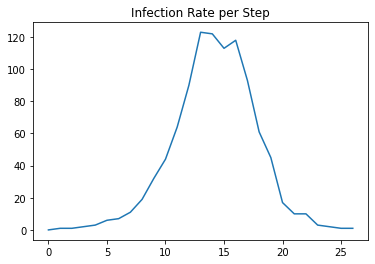

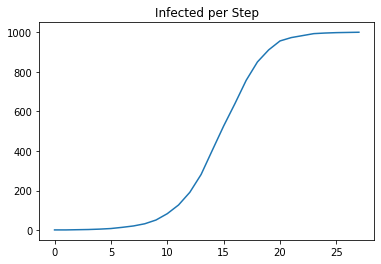

In [13]:
# δημιουργία κατάλληλων γραφήμάτων
rateGrouth_50p = []
for i in range (len(infectedArray_50p)-1):
  rate = infectedArray_50p[i+1] - infectedArray_50p[i]
  rateGrouth_50p.append(rate)

print(len(infectedArray))
plt.plot(rateGrouth_50p)
plt.title("Infection Rate per Step")
plt.show()

print("\n")
plt.plot(infectedArray_50p)
plt.title("Infected per Step")
plt.show()


Στην επόμενη προσομοίωση προσωμοιάζεται ένα σενάριο όπου η μόλυνση γίνεται κάθε 3 timesteps

In [14]:
# Περίπτωση για μόλυνση με πιθανότητα 50%

# variables

# το πλήθος των υπολογιστών
N = 1000
# πίνακας 2D για την δημιουργία του simulation
system = np.zeros(N)
# υγιείς κόμβοι (όσοι δεν έχουν μολυνθεί ακόμα).
healthyNodes = 0 
# το πλήθος των μολυσμένων υπολογιστών
infectedNodes = 0
# το πλήθος των μολυσμένων υπολογιστών στο συγκεκριμένο timestep
currentInfected = 0 
# πίνακας για αποθήκευση των μολυσμένων κόμβων
infectedArray_3steps = []

# προσθήκη counter για μείωση των βημάτων
counter = 3

In [15]:
# παράγεται ένας τυχαίος ακέραιος για να μολυνθεί 
x = random.randint(0, N-1)
system[x] = 1

# αυξάνεται ο αριθμός των μολυσμένων και προστέθεται στο infectedArray
currentInfected = currentInfected + 1
infectedNodes = infectedNodes + 1
infectedArray.append(currentInfected)

# υλοποιείται η διαδικασία της μόλυνσης μέχρι να μολυνθούν όλοι οι υπολογιστές
while infectedNodes < N:
  # για κάθε μολυσμένο υπολογιστή βρες έναν υπολογστή να μολύνεις
  for i in range (0,currentInfected):
    infect = random.randint(0, N-1)

    # αν το counter έχει την τιμή 0, βάλε τιμή 3 για αρχικοποίηση
    if counter != 0:
      counter -= 1
    else: 
      counter = 3
      # αν ο Η/Υ είναι υγιής τότε γίνεται η μόλυνση
      if system[infect] == 0:
        system[infect] = 1
        currentInfected += 1
        infectedNodes += 1 
  infectedArray_3steps.append(currentInfected)

6430


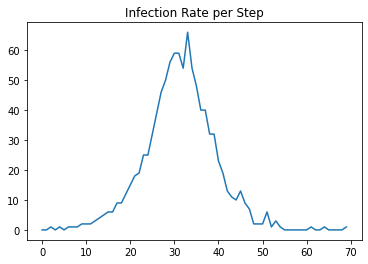

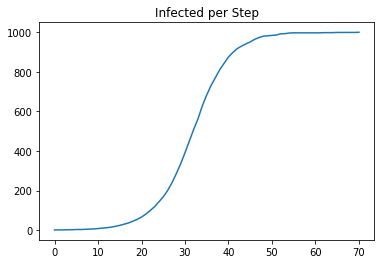

In [16]:
# δημιουργία κατάλληλων γραφήμάτων
rateGrouth_3steps = []
for i in range (len(infectedArray_3steps)-1):
  rate = infectedArray_3steps[i+1] - infectedArray_3steps[i]
  rateGrouth_3steps.append(rate)

print(len(infectedArray))
plt.plot(rateGrouth_3steps)
plt.title("Infection Rate per Step")
plt.show()

print("\n")
plt.plot(infectedArray_3steps)
plt.title("Infected per Step")
plt.show()


Οπτικοποίηση όλων των διαγραμμάτων σε ένα για καλύτερη σύγκριση

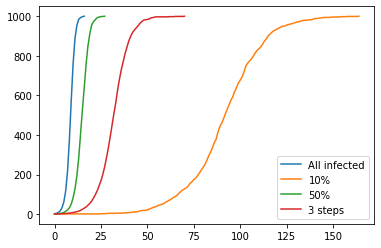

In [17]:
# compare all diagramms
# plt.plot(infectedArray, label = "Default")
plt.plot(infectedArray_chain, label = "All infected")
plt.plot(infectedArray_10p, label = "10%")
plt.plot(infectedArray_50p, label = "50%")
plt.plot(infectedArray_3steps, label = "3 steps")
plt.legend()
plt.show()


# Εργαστήριο 3

## Περίπτωση 2η
Οι Η/Υ του δικτύου διαθέτουν εγκατεστημένο λογισμικό προστασίας (antivirus) και
σε κάθε χρονική στιγμή ο κάθε μολυσμένος Η/Υ επιλέγει με τυχαίο τρόπο να μολύνει
άλλον ένα ακόμα Η/Υ. Η ανοσία σε κάθε μολυσμένο κόμβο επέρχεται είτε μετά από
σταθερό αριθμό βημάτων χρόνου (π.χ. 10 timesteps) μετά την μόλυνση είτε μετά από
τυχαίο αριθμό βημάτων μεταξύ ενός διαστήματος βημάτων χρόνου (πχ. 1 έως 100
timesteps) για να “γιατρευτεί” ο κάθε μολυσμένος κόμβος. Στην περίπτωση που
γιατρεύεται ένας κόμβος θεωρούμε ότι εγκαθίσταται λογισμικό προστασίας και μετά
από τα x timesteps υπάρχει ανοσία.

1. Να τροποποιήσετε τον κώδικα του προηγούμενου εργαστηρίου ούτως ώστε
να προσομοιώνει το παραπάνω πρόβλημα.

2. Να παραστήσετε γραφικά τον αριθμό μολυσμένων Η/Υ σε συνάρτηση με το
χρόνο.

3. Μεταβάλλοντας το ρυθμό μετάδοσης β του κακόβουλου λογισμικού στη
μονάδα του χρόνου, να παραστήσετε γραφικά την εξέλιξη του πληθυσμού
των μολυσμένων Η/Υ σε συνάρτηση με το χρόνο. Τι παρατηρείτε;

In [18]:
# πλήθος Η/Υ
N = 1000

# αριθμός μολυσμένων Η/Υ
infectedNodes = 0

# αριθμός μολυσμένων στο συγκεκριμένο timestep
currentInfected = 0

# counter για τα timesteps για να έρθει η ανοσία
immune_nodes = 0

# σύστημα με ηλεκτρονικούς υπολογιστές
system = []

# πίνακας με το πλήθος των μολυσμένων
dataArray = []

# πίνακας με τους μολυσμένος κόμβους
infected_array = []

# πίνακας με τους κόμβους που έχουν ανοσία
immune_array = []

# Αν το state είναι 0 τότε είναι υγιής
# Αν το state είναι 1 τότε είναι μολυσμένος
# Αν το state είναι 2 τότε έχει ανοσία

In [19]:
# δημιουργία κλάσης για τον Η/Υ (περιέχει τα timesteps
# που χρειάζεται για να αποκτήσει ο κάθε υπολογιστής ανοσία στον ιό
# και το state του κάθε υπολογιστή) 
class Computer:
  def __init__ (self):
    self.timestep = 10
    self.state = 0
    

In [20]:
# Πρόσθεσε Ν αντικείμενα στο πίνακα system
for _ in range(N):
  system.append(Computer())

# Δημιούργησε έναν x αριθμό κόμβων και μόλυνέ τον 
x = random.randint(0,N-1)
system[x].state = 1 
infected_array.append(x)

# αυξάνεται ο αριθμός των μολυσμένων και προστέθεται στο dataArray
currentInfected = currentInfected + 1
infectedNodes = infectedNodes + 1
dataArray.append(currentInfected)

# κύριο μέρος του αλγορίοθμου
while infectedNodes < N: 
  # για κάθε υπολοστή που είναι μολυσμένος, 
  # βρες έναν τυχαίο υπολογιστή
  for i in range (currentInfected):
    z = random.randint(0,N-1)
    # έλεγχος αν ο υπολοστής είναι υγιής
    # αν είναι υγιής, μόλυνέ τον και κάνε το 
    # state του ίσο με 1
    if system[z].state == 0:
      system[z].state = 1
      infected_array.append(z)
      currentInfected = currentInfected + 1
      infectedNodes = infectedNodes + 1

    # για κάθε υπολογιστή που είναι μολυσμένος,
    # μείωσε το timestep του
    for inf in infected_array:
      system[inf].timestep -= 1
      # αν το timestep είναι ίσο με 0 
      # άλλαξε την κατάστασή του σε 2
      # και κάνε τον να έχει ανοσία
      if system[inf].timestep == 0:
        system[inf].state = 2
        immune_nodes += 1

  immune_array.append(immune_nodes)
  dataArray.append(infectedNodes)



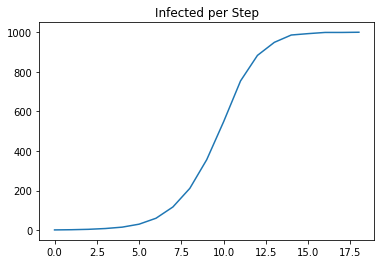

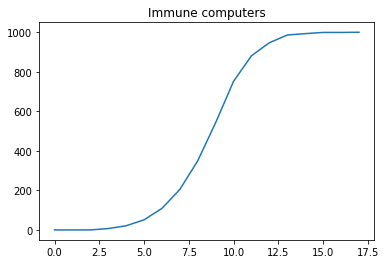

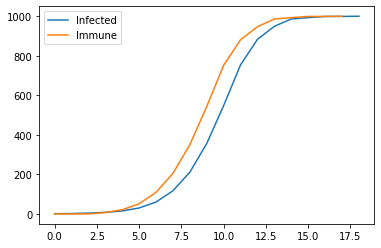

In [21]:
# διάγραμμα που δείχνει το πλήθος των μολυσμένων σε κάθε timestep
print("\n")
plt.plot(dataArray)
plt.title("Infected per Step")
plt.show()

# διάγραμμα που δείχνει το πλήθος των immune σε κάθε timestep
print("\n ")
plt.plot(immune_array)
plt.title("Immune computers")
plt.show()

print("\n")
## διάγραμμα που δείχνει το πλήθος των μολυσμένων και τους immune σε κάθε timestep
plt.plot(dataArray, label = "Infected")
plt.plot(immune_array, label = "Immune")
plt.legend()
plt.show()

# Εργαστήριο 4 (8.11.2021)

1. Χρησιμοποιώντας μέρος του κώδικα προηγούμενου εργαστηρίου που αφορούσε στη
μετάδοση κακόβουλου λογισμικού σε δίκτυο, υλοποιήστε τη διάδοση της πληροφορίας για Ν=20. Το πείραμα ξεκινά με ένα τυχαίο αισθητήρα να λαμβάνει τη σχετική πληροφορία (π.χ. ύπαρξη πυρκαγιάς). Η πληροφορία μεταδίδεται πάντα (πιθανότητα 100%) από 1 (ένα) και σε 2 μόνο 1 (ένα) αισθητήρα για κάθε χρονική στιγμή t. Να αποθηκεύσετε σε αρχείο τον αριθμό των αισθητήρων που λαμβάνουν την πληροφορία σε κάθε χρονική στιγμή t και να απεικονίσετε τα σχετικά αποτελέσματα.

2. Να εκτελέσετε το παραπάνω πείραμα για πιθανότητα μετάδοσης 30%, 50%, 80% και να
απεικονίσετε γραφικά τα σχετικά αποτελέσματα. Τι παρατηρείτε;


In [22]:
# μέγεθος πίνακα
grid_size = 20

# κόμβοι που έχουν λάβει την πληροφορία
informed = 0

# συνολικοί κόμβοι
total_nodes = grid_size * grid_size 

# πίνακας με τους κόμβους που έχουν λάβει την πληροφορία
informed_nodes = []

# πίνακας για το simulation και αρχικοποιησή του με 0
sim_arr = np.zeros(shape= (grid_size,grid_size) )

In [23]:
# βρίσκει δύο τυχαίους αριθμούς για να ξεκινήσει το simulation
x = random.randint(0,grid_size -1)
y = random.randint(0,grid_size -1)

# άλλάζει την κατάσταση της θέσης του 2D πίνακα από 0 σε 1
sim_arr[x][y] = 1
informed += 1

# μέχρι να ενημερωθούν όλοι οι κόμβοι
while informed < total_nodes:
  # βρες ένα τυχαίο x και ένα τυχαίο y 
  x = random.randint(0,grid_size -1)
  y = random.randint(0,grid_size -1)

  # έλεξε την κατάστασή τους και αν δεν είναι ενημερωμένοι
  # ενημερωσέ τους
  if sim_arr[x][y] == 0:
    sim_arr[x][y] = 1
    informed += 1

  informed_nodes.append(informed)

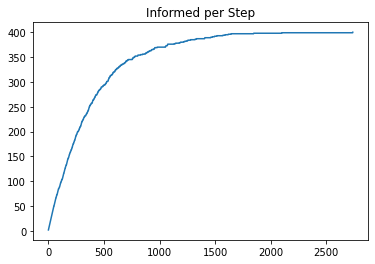

In [24]:
# εμφάνησε το διάγραμμα
plt.plot(informed_nodes)
plt.title("Informed per Step")
plt.show()

Υλοποίηση της περίπτωσης 2 με την ύπαρξη πιθανότητας

In [25]:
# μέγεθος πίνακα
grid_size = 20

# κόμβοι που έχουν λάβει την πληροφορία
informed = 0

# συνολικοί κόμβοι
total_nodes = grid_size * grid_size 

# πίνακας με τους κόμβους που έχουν λάβει την πληροφορία για κάθε πιθανότητα
informed_nodes30 = []
informed_nodes50 = []
informed_nodes80 = []

# πίνακας για το simulation και αρχικοποιησή του με 0
sim_arr = np.zeros(shape= (grid_size,grid_size) )

Για την μείωση της αντιγραφής του κώδικα, έκανα μια συνάρτηση για τον υπολογισμό της πιθανότητας. Η συνάρτηση θα έχει ως παράμετρο μια μεταβλητή i η οποία αν έχει την τιμή 0 θα τρέξει το simulation με πιθανότητα 30%, αν έχει την τιμή 1, με 50% και αν έχει την τιμή 2 με 80%. 




In [26]:
# συνάρτηση που επισρτέφει 0 αν ισχύει η συνθήκη και 
# 1 αν δεν ισχύει
def calculate_possibility(i):
  if i == 0:
    x = random.randint(1,10)
    if x <= 3:
      return 0
    else: 
      return 1

  elif i == 1:
    x = random.randint(1,10)
    if x <= 5:
      return 0
    else: 
      return 1

  elif i == 2:
    x = random.randint(1,10)
    if x <= 8:
      return 0
    else: 
      return 1
      

In [27]:
# βρίσκει δύο τυχαίους αριθμούς για να ξεκινήσει το simulation
x = random.randint(0,grid_size -1)
y = random.randint(0,grid_size -1)

# άλλάζει την κατάσταση της θέσης του 2D πίνακα από 0 σε 1
sim_arr[x][y] = 1
informed += 1

# for loop για τις 3 διαφορετικές πιθανότητες
for i in range (3):
  informed = 0
  sim_arr = np.zeros(shape= (grid_size,grid_size) )
  # μέχρι να ενημερωθούν όλοι οι κόμβοι
  while informed < total_nodes:
    # βρες ένα τυχαίο x και ένα τυχαίο y 
    x = random.randint(0,grid_size -1)
    y = random.randint(0,grid_size -1)

    # έλεχγος για τον υπολογισμό της πιθανότητας
    number = calculate_possibility(i)
    if number == 0:
    # έλεξε την κατάστασή τους και αν δεν είναι ενημερωμένοι
    # ενημερωσέ τους
      if sim_arr[x][y] == 0:
        sim_arr[x][y] = 1
        informed += 1

    # πίνακες που για κάθε μια από τις περιπτώσεις εκτέλεσης
    # αποθηκεύουν σε διαφορετικούς πίνακες τα δεδομένα
    if i == 0:
      informed_nodes30.append(informed)
    
    elif i == 1:
      informed_nodes50.append(informed)
    
    elif i == 2:
      informed_nodes80.append(informed)
    

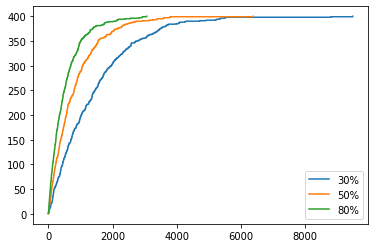

In [28]:
# διάγραμμα που δείχνει για την κάθε πιθανότητα την μετάδοση πληροφορίας
plt.plot(informed_nodes30, label = "30%")
plt.plot(informed_nodes50, label = "50%")
plt.plot(informed_nodes80, label = "80%")
plt.legend()
plt.show()

# Εργαστήριο 5 (21.11.2021)

Χρησιμοποιώντας μέρος του κώδικα προηγούμενου εργαστηρίου που αφορούσε στη μετάδοση κακόβουλου λογισμικού σε δίκτυο, υλοποιήστε τη διάδοση της πληροφορίας για Ν=20. Το πείραμα ξεκινά με ένα τυχαίο αισθητήρα να λαμβάνει τη σχετική πληροφορία (π.χ. ύπαρξη πυρκαγιάς). 

Η πληροφορία μεταδίδεται πάντα (πιθανότητα 100%) από 1 (ένα) και σε μόνο 1 (ένα) αισθητήρα για κάθε χρονική στιγμή t. Να αποθηκεύσετε σε αρχείο τον αριθμό των αισθητήρων που λαμβάνουν την πληροφορία σε κάθε χρονική στιγμή t και να απεικονίσετε τα σχετικά αποτελέσματα. 

**Ερώτημα:** Να εκτελέσετε το παραπάνω πείραμα για Ν=5, Ν=10, Ν=30, Ν=50 και να απεικονίσετε τα σχετικά αποτελέσματα για την κανονικοποιημένη καταστατική μεταβλητή α=Ι/Ν. Τι παρατηρείτε;

In [29]:
# μέγεθος πίνακα
grid_size = 0

# κόμβοι που έχουν λάβει την πληροφορία
informed = 0

# συνολικοί κόμβοι
total_nodes = grid_size * grid_size 

# πίνακας με τους κόμβους που έχουν λάβει την πληροφορία για κάθε πιθανότητα
informed_nodes5 = []
informed_nodes10 = []
informed_nodes30 = []
informed_nodes30 = []

# πίνακας για το simulation και αρχικοποιησή του με 0
sim_arr = np.zeros(shape= (grid_size,grid_size) )

In [30]:
# def calculate_grid_size(i):
#   if i == 0:
#     grid_size = 5   
#     return grid_size

#   if i == 1:
#     grid_size = 10
#     return grid_size

#   if i == 2:
#     grid_size = 30
#     return grid_size

#   if i == 3:
#     grid_size = 50
#     return grid_size

In [31]:
informed_nodes5 = []

# μέγεθος πίνακα
grid_size = 5

# κόμβοι που έχουν λάβει την πληροφορία
informed = 0

# συνολικοί κόμβοι
total_nodes = grid_size * grid_size 

# πίνακας για το simulation και αρχικοποιησή του με 0
sim_arr = np.zeros(shape= (grid_size,grid_size) )

# βρίσκει δύο τυχαίους αριθμούς για να ξεκινήσει το simulation
x = random.randint(0,grid_size -1)
y = random.randint(0,grid_size -1)

# άλλάζει την κατάσταση της θέσης του 2D πίνακα από 0 σε 1
sim_arr[x][y] = 1
informed += 1

# μέχρι να ενημερωθούν όλοι οι κόμβοι
while informed < total_nodes:
  # βρες ένα τυχαίο x και ένα τυχαίο y 
  x = random.randint(0,grid_size -1)
  y = random.randint(0,grid_size -1)

  # έλεξε την κατάστασή τους και αν δεν είναι ενημερωμένοι
  # ενημερωσέ τους
  if sim_arr[x][y] == 0:
    sim_arr[x][y] = 1
    informed += 1

  informed_nodes5.append(informed)


In [32]:
informed_nodes10 = []

# μέγεθος πίνακα
grid_size = 10

# κόμβοι που έχουν λάβει την πληροφορία
informed = 0

# συνολικοί κόμβοι
total_nodes = grid_size * grid_size 

# πίνακας για το simulation και αρχικοποιησή του με 0
sim_arr = np.zeros(shape= (grid_size,grid_size) )

# βρίσκει δύο τυχαίους αριθμούς για να ξεκινήσει το simulation
x = random.randint(0,grid_size -1)
y = random.randint(0,grid_size -1)

# άλλάζει την κατάσταση της θέσης του 2D πίνακα από 0 σε 1
sim_arr[x][y] = 1
informed += 1

# μέχρι να ενημερωθούν όλοι οι κόμβοι
while informed < total_nodes:
  # βρες ένα τυχαίο x και ένα τυχαίο y 
  x = random.randint(0,grid_size -1)
  y = random.randint(0,grid_size -1)

  # έλεξε την κατάστασή τους και αν δεν είναι ενημερωμένοι
  # ενημερωσέ τους
  if sim_arr[x][y] == 0:
    sim_arr[x][y] = 1
    informed += 1

  informed_nodes10.append(informed)


In [33]:
informed_nodes30 = []

# μέγεθος πίνακα
grid_size = 30

# κόμβοι που έχουν λάβει την πληροφορία
informed = 0

# συνολικοί κόμβοι
total_nodes = grid_size * grid_size 

# πίνακας για το simulation και αρχικοποιησή του με 0
sim_arr = np.zeros(shape= (grid_size,grid_size) )

# βρίσκει δύο τυχαίους αριθμούς για να ξεκινήσει το simulation
x = random.randint(0,grid_size -1)
y = random.randint(0,grid_size -1)

# άλλάζει την κατάσταση της θέσης του 2D πίνακα από 0 σε 1
sim_arr[x][y] = 1
informed += 1

# μέχρι να ενημερωθούν όλοι οι κόμβοι
while informed < total_nodes:
  # βρες ένα τυχαίο x και ένα τυχαίο y 
  x = random.randint(0,grid_size -1)
  y = random.randint(0,grid_size -1)

  # έλεξε την κατάστασή τους και αν δεν είναι ενημερωμένοι
  # ενημερωσέ τους
  if sim_arr[x][y] == 0:
    sim_arr[x][y] = 1
    informed += 1

  informed_nodes30.append(informed)


In [34]:
informed_nodes50 = []

# μέγεθος πίνακα
grid_size = 50

# κόμβοι που έχουν λάβει την πληροφορία
informed = 0

# συνολικοί κόμβοι
total_nodes = grid_size * grid_size 

# πίνακας για το simulation και αρχικοποιησή του με 0
sim_arr = np.zeros(shape= (grid_size,grid_size) )

# βρίσκει δύο τυχαίους αριθμούς για να ξεκινήσει το simulation
x = random.randint(0,grid_size -1)
y = random.randint(0,grid_size -1)

# άλλάζει την κατάσταση της θέσης του 2D πίνακα από 0 σε 1
sim_arr[x][y] = 1
informed += 1

# μέχρι να ενημερωθούν όλοι οι κόμβοι
while informed < total_nodes:
  # βρες ένα τυχαίο x και ένα τυχαίο y 
  x = random.randint(0,grid_size -1)
  y = random.randint(0,grid_size -1)

  # έλεξε την κατάστασή τους και αν δεν είναι ενημερωμένοι
  # ενημερωσέ τους
  if sim_arr[x][y] == 0:
    sim_arr[x][y] = 1
    informed += 1

  informed_nodes50.append(informed)


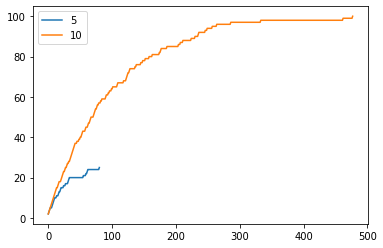

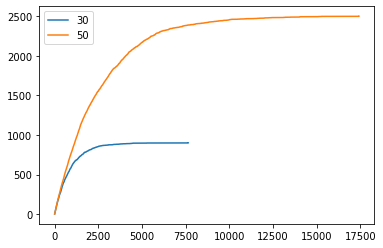

In [35]:
# διάγραμμα που δείχνει για την κάθε μέγεθος του πίνακα την μετάδοση πληροφορίας
plt.plot(informed_nodes5, label = "5")
plt.plot(informed_nodes10, label = "10")
plt.legend()
plt.show()


plt.plot(informed_nodes30, label = "30")
plt.plot(informed_nodes50, label = "50")
plt.legend()
plt.show()


# Εργαστήριο 6 (06.12.2021)

Για την προσομοίωση του OFC μοντέλου απαιτούνται τρεις δισδιάστατοι πίνακες διαστάσεων ΝxΜ: Ο πρώτος πίνακας αντιπροσωπεύει το κυψελικό αυτόματο, δηλαδή την ενδοεπιφάνεια των τεκτονικών πλακών, ο δεύτερος θα χρησιμοποιηθεί βοηθητικά για την ανακατανομή των δυνάμεων και ο τρίτος θα χρησι μοποιηθεί βοηθητικά για την μέτρηση του μεγέθους του σεισμού. Επίσης θα χρειαστεί ένας μετρητής που θα μετράει τον χρόνο, μία σταθερά που θα αντιπροσωπεύει την Fcrit και ένα αρχείο στο οποίο θα καταγράφεται η σεισμική δραστηριότητα που αναπαράγει η προσομοίωση. Πραγματοποιείται αρχικοποίηση των κελιών του πρώτου πίνακα με τυχαίες τιμές από 0 έως Fcrit = 4. Για κάθε χρονική στιγμή t, γίνεται μία αύξηση της τιμής τους κατά μια πολύ μικρή τιμή Fout=0,001 , η οποία αντιπροσωπεύει την Fout και πραγματοποιείται μηδενισμός όλων των κελιών των δύο βοηθητικών πινάκων.


In [36]:

fout = 0.001

fcrit = 4

# μέγεθος του πίνακα
grid_size = 20

# πίνακας για τα simulations
sim_arr = np.zeros(shape= (grid_size,grid_size) )

# πίνακας για την οπτικοποίηση
view_array = np.zeros(shape= (grid_size,grid_size) )



In [37]:
# συνάρτηση για εύρεση γειτόνων
def find_neighbors(i, j, size):
  neighbors = []
  for x in range(i-1,i+2):
    for y in range(j-1,j+2):
      if((x >= 0) and (x <= size) and (y >= 0) and (y <= size)):
        neighbors.append([x,y])

  return neighbors

In [38]:
# αρχικοποίηση του πίνακα για το simulation με τυχαίες τιμές
for i in range( grid_size):
  for j in range( grid_size):
    randnum = round(random.uniform(0.1,3.99),3)
    sim_arr[i][j] = randnum

# βάζω σε ένα τυχαίο κελί την τιμή 3,999 για να ξεκινήσει το simulation 
# από το πρώτο timesteo
x = random.randint(0, grid_size-1 )
y = random.randint(0, grid_size-1 )

sim_arr[x][y] = 3.999

# τρέχω το simulation 5 φορές για μεγαλύτερη επιφάνεια του σεισμού
for i in range (5):
  for x in range( grid_size-1 ):
    for y in range( grid_size-1 ):

      # προστείθεται η fout σε κάθε βήμα
      sim_arr[x][y] = sim_arr[x][y] + fout

      # ελέγχει αν η τιμή του πλακιδίου είναι μεγαλύτερη 
      # ή ίση της fcrit
      if sim_arr[x][y] >= fcrit :
        view_array[x][y] = 1
        
        # ψάχνει να βρει τους γείτονες
        neighbors = find_neighbors(x,y,grid_size)
        
        # για κάθε γείτονα υπολογίζει την τιμή του πλακιδίου
        # μετά το σπάσιμο
        for k in range (len(neighbors)):
            possition = neighbors[k]
            (s,t) = possition
            add = sim_arr[x][y] * 0.25
            sim_arr[s][t] = sim_arr[s][t] + add

        # μηδενίζει την τιμή του πλακιδίου που έσπασε
        sim_arr[x][y] = 0

# εμφανίζει τον πίνακα που οπτικοποιεί το simualtion για 5 timesteps
print("\n")
print(view_array)



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 